In [162]:
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
import requests
import os

In [164]:
from torch import optim
from torch.utils.data import DataLoader, Dataset

In [165]:
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [166]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [167]:
df.rename(columns=lambda x: x.strip(), inplace=True)
list(df.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [168]:
df['income'] = df['income'].str.strip().replace('<=50K', 1).replace('>50K', 2)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [169]:
print(df.income.unique())
df['sex']
list(df.columns)

[1 2]


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

/home/treoroygbiv/anaconda3/envs/treo/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

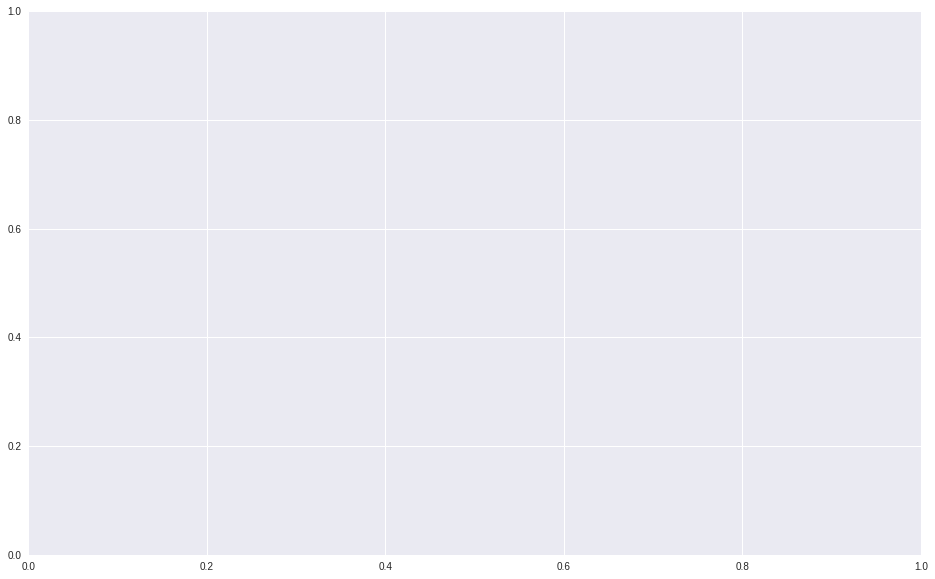

In [170]:
# df['education'] = df['education'].str.strip()
df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
first = df[df.education == 'Bachelors']
sns.lineplot('marital-status', 'income', data=first, hue='sex')

In [171]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,2
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


In [182]:
xy = df.to_numpy().astype('float32')
print(xy)

[[3.90000e+01 0.00000e+00 7.75160e+04 ... 4.00000e+01 0.00000e+00
  1.00000e+00]
 [5.00000e+01 1.00000e+00 8.33110e+04 ... 1.30000e+01 0.00000e+00
  1.00000e+00]
 [3.80000e+01 2.00000e+00 2.15646e+05 ... 4.00000e+01 0.00000e+00
  1.00000e+00]
 ...
 [5.80000e+01 2.00000e+00 1.51910e+05 ... 4.00000e+01 0.00000e+00
  1.00000e+00]
 [2.20000e+01 2.00000e+00 2.01490e+05 ... 2.00000e+01 0.00000e+00
  1.00000e+00]
 [5.20000e+01 6.00000e+00 2.87927e+05 ... 4.00000e+01 0.00000e+00
  2.00000e+00]]


In [183]:
import torch

# x,y=x.type(torch.float32), y.type(torch.float32)
x = torch.from_numpy(xy[:, :-1]).type(torch.float32)
y = torch.from_numpy(xy[:, [-1]]).type(torch.float32)
print(x)
print(y)

tensor([[3.9000e+01, 0.0000e+00, 7.7516e+04,  ..., 0.0000e+00, 4.0000e+01,
         0.0000e+00],
        [5.0000e+01, 1.0000e+00, 8.3311e+04,  ..., 0.0000e+00, 1.3000e+01,
         0.0000e+00],
        [3.8000e+01, 2.0000e+00, 2.1565e+05,  ..., 0.0000e+00, 4.0000e+01,
         0.0000e+00],
        ...,
        [5.8000e+01, 2.0000e+00, 1.5191e+05,  ..., 0.0000e+00, 4.0000e+01,
         0.0000e+00],
        [2.2000e+01, 2.0000e+00, 2.0149e+05,  ..., 0.0000e+00, 2.0000e+01,
         0.0000e+00],
        [5.2000e+01, 6.0000e+00, 2.8793e+05,  ..., 0.0000e+00, 4.0000e+01,
         0.0000e+00]])
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [2.]])


In [174]:
df_obj = df.select_dtypes(['object'])
df_obj_cols = list(df_obj.columns)

In [178]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,2
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1


In [180]:
for i in df_obj_cols:
    unique_vals = list(df_obj[i].unique())
#     print(unique_vals)
    for n in range(len(unique_vals)):
        print(df[i])
        df[i] = df[i].replace(unique_vals[n], n)

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object
0                        0
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object
0                    0
1                    1
2              Private
3              Private
4              Private
             ...      
32556          Private
32557          Private
32558          Private
32559          Private
32560     Self-emp-inc
Name: workclass, Length: 32561, dtype: object
0              

0        0
1        0
2        0
3        0
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native-country, Length: 32561, dtype: object
0        0
1        0
2        0
3        0
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native-country, Length: 32561, dtype: object
0        0
1        0
2        0
3        0
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native-country, Length: 32561, dtype: object
0        0
1        0
2        0
3        0
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native-country, Length: 32561, dtype: object
0        0
1        0
2        0
3        0
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native-country, Length: 32561, dtype: object
0        0
1        0
2        0
3        0
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native-countr

In [181]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,1
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,1
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,1
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,1
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,1,10,2,0,1,0,0,38,0,1
32557,40,2,154374,1,9,1,9,1,0,0,0,0,40,0,2
32558,58,2,151910,1,9,6,0,4,0,1,0,0,40,0,1
32559,22,2,201490,1,9,0,0,3,0,0,0,0,20,0,1
